<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Session_7_moneyball_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moneyball - Sports Analytics - Baseball

In [ ]:
# Uses baseball.csv
# Explanation of baseball: https://www.youtube.com/watch?v=0bKkGeROiPA

Logic:
1. Wins are a function of run difference. Show this with a linear regression.

2. Runs are a function of OBP (on base percentage) and SLG (slugging). Create a linear regression that computes runs as a function of OBP and SLG.

3. Runs allowed are a function of opponents OBP and SLG. Create a linear regression - could use the same as 2.

4. Using data for 2002 season, compute Oakland Runs and Runs Allowed. Compute Run difference (Runs - Runs Allowed). Use Run difference to compute wins.

5. Need 95 wins to make it to the playoffs.

## Load the dataset

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the data
url = "baseball (4) (1).csv"
baseball = pd.read_csv(url)

# Subset to Moneyball years (before 2002)
moneyball = baseball[baseball['Year'] < 2002].copy()

# Calculate Run Difference (RD)
moneyball['RD'] = moneyball['RS'] - moneyball['RA']

## Demonstrate wins vs run difference relationship

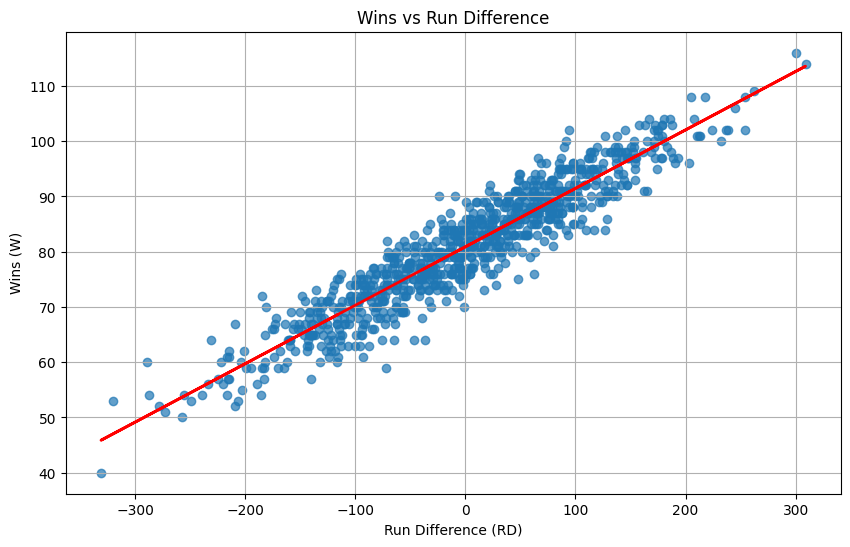

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:25:47   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.0

In [ ]:
# https://www.youtube.com/watch?v=Tzin1DgexlE

# --------------------------
# 1. Wins vs Run Difference
# --------------------------
# Regression model
wins_model = smf.ols('W ~ RD', data=moneyball).fit()

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(moneyball['RD'], moneyball['W'], alpha=0.7)
plt.plot(moneyball['RD'], wins_model.predict(), color='red', linewidth=2)
plt.title('Wins vs Run Difference')
plt.xlabel('Run Difference (RD)')
plt.ylabel('Wins (W)')
plt.grid(True)
plt.show()

print(wins_model.summary())


In [ ]:
# 5 minute exercise
# Can you create a better model using machine learning?

## Create 'Runs Scored' linear model

In [ ]:

# --------------------------
# 2. Runs Scored (RS) Model
# --------------------------
# Regression model (using OBP + SLG)
rs_model = smf.ols('RS ~ OBP + SLG', data=moneyball).fit()
print(rs_model.summary())

# https://www.youtube.com/watch?v=3MjxoaynCmk (scouts; before)
# https://www.youtube.com/watch?v=vyvu1nWjOlI (hatty; after)


                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:32:47   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -804.6271     18.921    -42.526      0.0

In [ ]:
# 5 minute exercise
# Can you create a better model using machine learning?

## Create 'Runs Allowed' Linear Model

In [ ]:

# --------------------------
# 3. Runs Allowed (RA) Model
# --------------------------
# Regression model
# 10/11 runs = 1 win
ra_model = smf.ols('RA ~ OOBP + OSLG', data=moneyball).fit()
print(ra_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           1.16e-45
Time:                        15:59:14   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -837.3779     60.255    -13.897      0.0

In [ ]:
# 5 minute
# Can you create a better model using machine learning?

In [ ]:

# --------------------------
# 4. Predict 2002 Oakland A's
# --------------------------
# Values from Moneyball (predicted 2002 team stats)
obp_2002 = 0.339
slg_2002 = 0.430
oobp_2002 = 0.307
oslg_2002 = 0.373

# Predict RS and RA
predicted_RS = rs_model.params['Intercept'] + rs_model.params['OBP']*obp_2002 + rs_model.params['SLG']*slg_2002
predicted_RA = ra_model.params['Intercept'] + ra_model.params['OOBP']*oobp_2002 + ra_model.params['OSLG']*oslg_2002
predicted_RD = predicted_RS - predicted_RA
predicted_W = wins_model.params['Intercept'] + wins_model.params['RD']*predicted_RD

print(f"\nPredicted 2002 Oakland A's Performance:")
print(f"Runs Scored (RS): {predicted_RS:.1f}")
print(f"Runs Allowed (RA): {predicted_RA:.1f}")
print(f"Run Difference (RD): {predicted_RD:.1f}")
print(f"Expected Wins: {predicted_W:.1f}")


Predicted 2002 Oakland A's Performance:
Runs Scored (RS): 805.0
Runs Allowed (RA): 621.9
Run Difference (RD): 183.1
Expected Wins: 100.2


In [ ]:
# 5 minute exercise
# Is this enough to get into the playoffs?

## Calculate wins needed to make playoffs

### Method 1: Calculate stats for playoff & non-playoff teams

In [ ]:
# Calculate how many wins needed to make playoffs
# To Do: Needs to improve. Run a decision tree or regression?

# Filter data for teams that made and didn't make the playoffs
playoff_teams = baseball[baseball['Playoffs'] == 1]
non_playoff_teams = baseball[baseball['Playoffs'] == 0]

# Calculate the minimum, average, and maximum number of wins for playoff teams
min_wins_playoff = playoff_teams['W'].min()
average_wins_playoff = playoff_teams['W'].mean()
max_wins_playoff = playoff_teams['W'].max()

# Calculate the corresponding stats for non-playoff teams
max_wins_non_playoff = non_playoff_teams['W'].max()

print("Playoff Wins Analysis:")
print(f"Minimum Wins for Playoff Teams: {min_wins_playoff}")
print(f"Average Wins for Playoff Teams: {average_wins_playoff:.2f}")
print(f"Maximum Wins for Playoff Teams: {max_wins_playoff}")
print(f"Maximum Wins for Non-Playoff Teams: {max_wins_non_playoff}")

# Determine a possible win threshold to qualify for playoffs
win_threshold = max_wins_non_playoff + 1
print(f"Suggested Win Threshold for Playoff Qualification: {win_threshold}")


Playoff Wins Analysis:
Minimum Wins for Playoff Teams: 82
Average Wins for Playoff Teams: 95.12
Maximum Wins for Playoff Teams: 116
Maximum Wins for Non-Playoff Teams: 103
Suggested Win Threshold for Playoff Qualification: 104


### Method 2: Plot

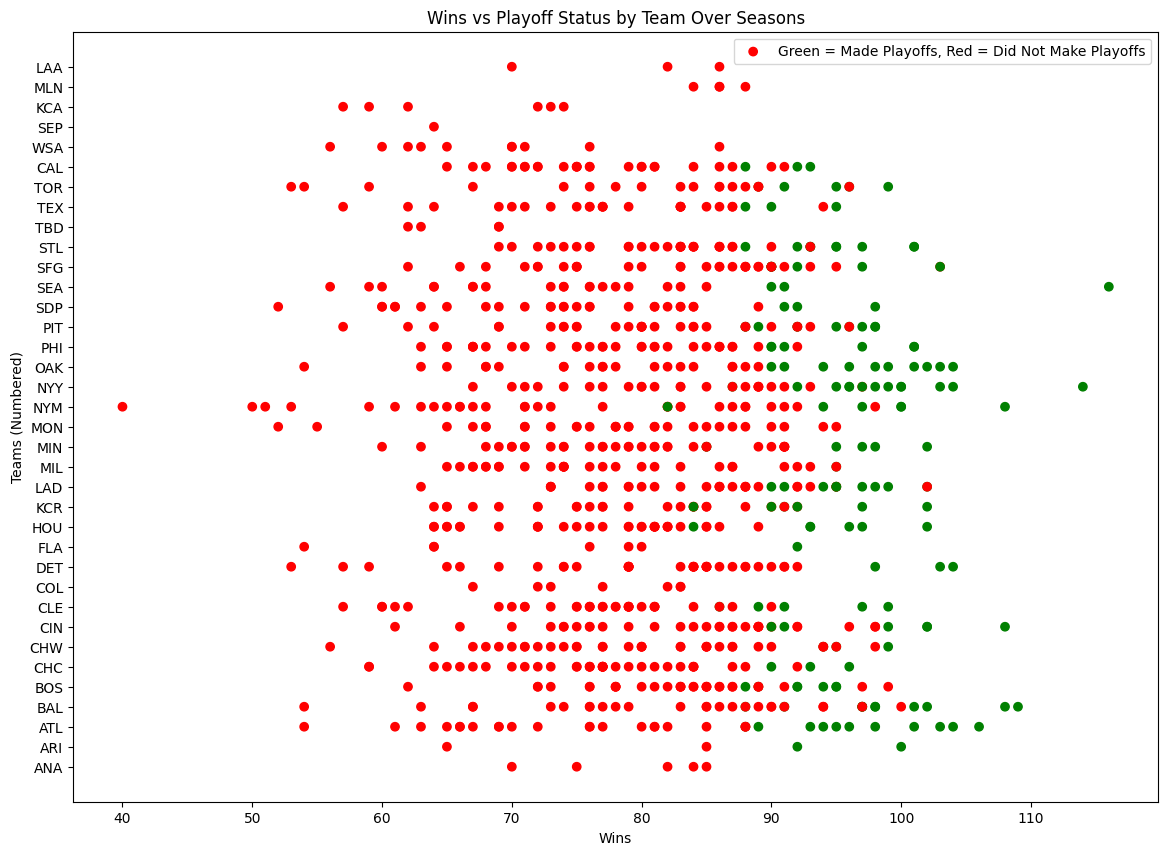

In [ ]:
# Plot wins vs playoff status with all seasons for a single team in a row
plt.figure(figsize=(14, 10))

# Scatter plot for wins vs playoff status
plt.scatter(moneyball['W'], moneyball['Team'],
            c=moneyball['Playoffs'].apply(lambda x: 'green' if x == 1 else 'red'))

plt.title('Wins vs Playoff Status by Team Over Seasons')
plt.xlabel('Wins')
plt.ylabel('Teams (Numbered)')
plt.legend(['Green = Made Playoffs, Red = Did Not Make Playoffs'])
plt.show()

# Visually inspect plot. Note that 95 is a good cutoff.

### Method 3: Decision Tree

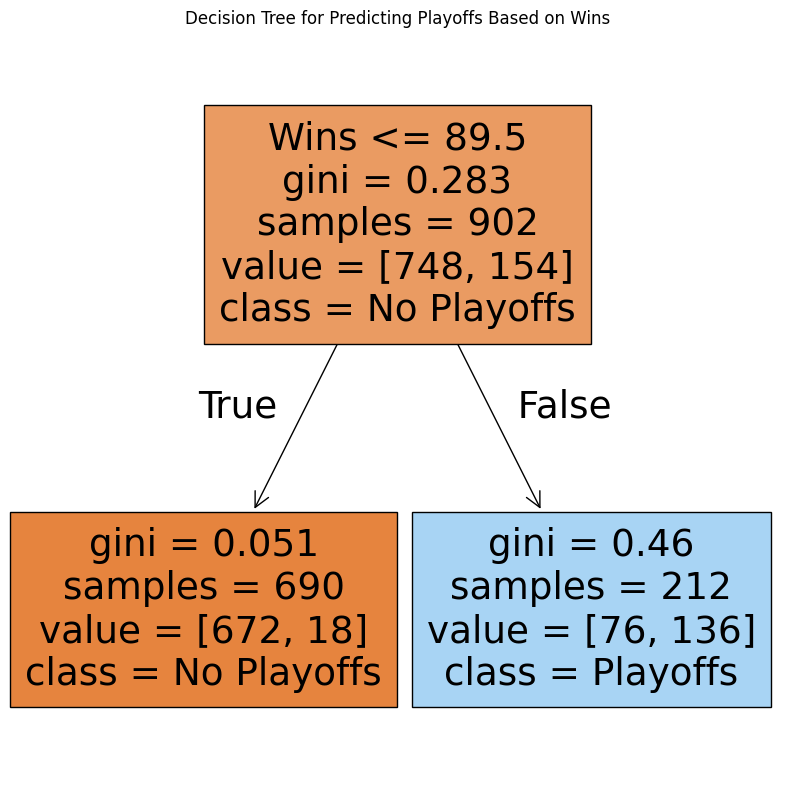

In [ ]:
# Calculate number of wins needed to make playoffs using a decision tree of depth = 1
# Result: 90 and above wins is enough

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Prepare features (W) and target variable (Playoffs)
X = moneyball[['W']]
y = moneyball['Playoffs']

# Create the decision tree model
model = DecisionTreeClassifier(max_depth=1, random_state=42)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(model, feature_names=['Wins'], class_names=['No Playoffs', 'Playoffs'], filled=True)
plt.title('Decision Tree for Predicting Playoffs Based on Wins')
plt.show()

### Method 4: Create table based on historical results

In [ ]:
# Create table that shows probability of making wins as function of playoffs

# Initialize a list to store the results
results = []

# Calculate the probability of making playoffs for wins from 80 to 100
for wins in range(80, 101):
    # Filter the data for teams with the current win total or greater
    subset = moneyball[moneyball['W'] >= wins]

    # Calculate the probability of making playoffs
    if not subset.empty:
        probability = subset['Playoffs'].mean()  # Mean will give the probability
    else:
        probability = 0.0  # No teams with this win total

    # Append the result
    results.append({'Wins': wins, 'Probability of Playoffs': probability})

# Create a DataFrame from the results
probability_df = pd.DataFrame(results)

# Display the DataFrame
print(probability_df)

    Wins  Probability of Playoffs
0     80                 0.308000
1     81                 0.324895
2     82                 0.345291
3     83                 0.360000
4     84                 0.392308
5     85                 0.419444
6     86                 0.455927
7     87                 0.501684
8     88                 0.550186
9     89                 0.589958
10    90                 0.641509
11    91                 0.677596
12    92                 0.721519
13    93                 0.762963
14    94                 0.786885
15    95                 0.818182
16    96                 0.833333
17    97                 0.848101
18    98                 0.870968
19    99                 0.914894
20   100                 0.923077


In [ ]:
# https://www.youtube.com/watch?v=YLPq3uiXQnU

In [ ]:
# A1 simulation: https://www.kaggle.com/datasets/michaeldelamaza/2023-usa-masters-outdoor-track-and-field-rankings